# Machine Learning Project - Ames Housing Data

## Yi Cao, Ling (Danny) Ge Zeng, Daniel Choy

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import pandas as pd
import matplotlib as mpl
# import chart_studio.plotly as py
import numpy as np
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# from geopy import Nominatim
# from geopy.extra.rate_limiter import RateLimiter
%matplotlib inline

In [2]:
# Run the file Data_Preprocessing.ipynb which cleaned the data. Pre-processed data are saved in the data file

housing = pd.read_csv('data/Ames_Housing_Price_Data.csv', index_col = 0)
real_estate = pd.read_csv('data/Ames_Real_Estate_Data.csv', index_col = 0)
# combined data set:
ames_df = pd.read_csv('data/final_df.csv', index_col = 0)

/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


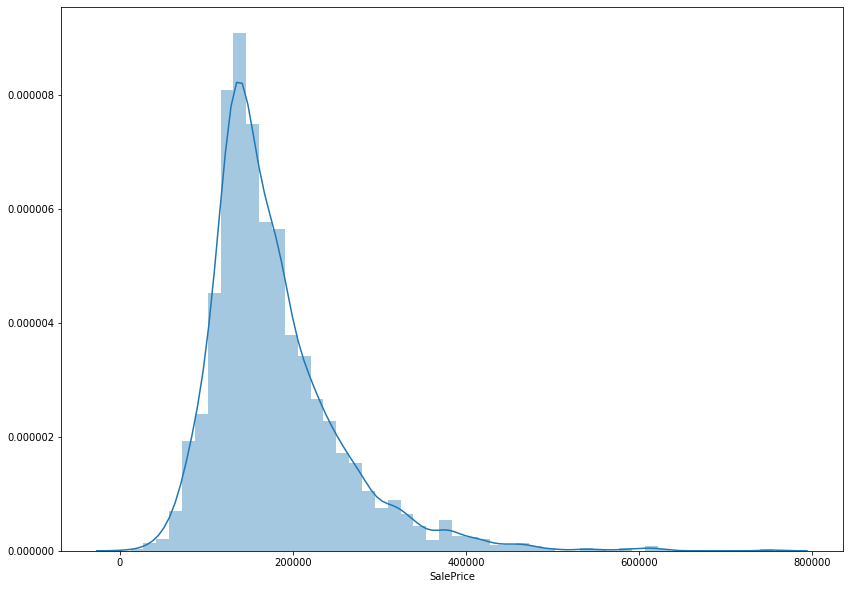

In [3]:
# SalePrice Histogram
plt.figure(figsize = (14,10))
sns.distplot(housing['SalePrice']);

In [5]:
geo_heatmap = {
    'Neighborhood' : ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards',\
        'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes','OldTown',\
        'SWISU','Sawyer','SawyerW', 'Somerst', 'StoneBr', 'Timber','Veenker', 'Greens'],\
    'Latitude' : [42.0563761, 42.0218678, 42.052795, 42.024546, 42.0360959, 42.0214232, 42.028025, 42.0154024,\
        42.1068177, 42.0204395, 41.997282, 41.9903084, 42.046618, 42.048164, 42.0258352, 42.0597732, 42.0457802,\
        42.029046, 42.0266187, 42.0295218, 42.034611, 42.0508817, 42.0595539, 41.9999732, 42.0413042, 42.001350383364695],\
    'Longitude' : [-93.6466598, -93.6702853, -93.6310097, -93.6545201, -93.6575849, -93.6584089, -93.6093286,
        -93.6875441, -93.6553512, -93.6243787, -93.6138098, -93.603242, -93.6362807, -93.6496766, -93.6613958,
        -93.65166, -93.6472075, -93.6165288, -93.6486541, -93.7102833, -93.7024257, -93.6485768, -93.6365891,
        -93.6518812, -93.6524905, -93.6446034587931]
}

In [ ]:
ames_neighborhood = set(ames_df['Neighborhood'].tolist())

geo_dataframe = pd.DataFrame.from_dict(geo_heatmap)

geo_dataframe = geo_dataframe[geo_dataframe['Neighborhood'].isin(ames_neighborhood)]

geo_dataframe["SalePrice"] = pd.Series(ames_df.groupby(["Neighborhood"]).mean()["SalePrice"].values,\
                                       index = geo_dataframe.index)

import folium
from folium.plugins import HeatMap
max_amount = float(geo_dataframe['SalePrice'].max())
hmap = folium.Map(location = [42.045042,-93.6473567], zoom_start = 12)
hm_wide = HeatMap(list(zip(geo_dataframe.Latitude.values, geo_dataframe.Longitude.values,\
                              geo_dataframe.SalePrice.values)),
                   min_opacity = 0.4,
                   max_val = max_amount,
                       radius = 40,
                   blur = 20,
                   max_zoom = 1

In [7]:
hmap.add_child(hm_wide)